In [4]:
### qqq

In [5]:
import time
import os
import numpy as np
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
import ast
import stumpy
from stumpy import config
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

auxiliary_codes_path =  ".." + os.sep + "codigo_auxiliares"
sys.path.append(auxiliary_codes_path)
import essencials as es

In [6]:
# Variables
# Base Dir ../Dataset
baseDir = os.path.join('..', 'Dataset')

## Seach pacth of MEASURE files
MAIN_LIST_MEASURE = []

# File_name to find
MEASURE_FILE_PATH = 'VD_WORDS_OCCURRENCE.CSV'

########## - Find only in DD-Local and - YT
# Break 1 - Exclude the Folder of References
# Variables
# B1.1 - Collect in DD-Local
#baseDir_local = os.path.join(baseDir, 'DD-Local')
# Call the basic function
#MAIN_LIST_MEASURE_local = list_scan_from_path (baseDir_local, MEASURE_FILE_PATH)
MAIN_LIST_MEASURE_local = []
# Variables
# B1.2 - Collect in YT
baseDir_yt = os.path.join(baseDir, 'YT-Online')
# Call the basic function
MAIN_LIST_MEASURE_yt = es.list_scan_from_path (baseDir_yt, MEASURE_FILE_PATH)

# Join the Two Lists
MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_yt

In [7]:
SUB_FILE_NAME = 'VD_SUBTITLES.CSV'
MAIN_LIST_MEASURE_FILTER = []
for current_path in MAIN_LIST_MEASURE:
    path = es.collect_current_path(current_path)
    check, _ = es.check_file_exist(path, SUB_FILE_NAME)
    if check:
        MAIN_LIST_MEASURE_FILTER.append(current_path)  

## Reading all Word Occurrence files

In [8]:
# Select the time-serie
VD_INFO_DT = 'VD_INFO.CSV'
TOTAL = pd.DataFrame()
for current_path in MAIN_LIST_MEASURE_FILTER:
    path_dir = es.collect_current_path(current_path)
    vd_info_path = os.path.join(path_dir, VD_INFO_DT)
    
    vd_info = pd.read_csv(vd_info_path)
    vd_info.drop(columns=['Unnamed: 0'], inplace=True)
    video_id =  vd_info.video_id[0]
    
    try:
        VD_WORDS_OCCURRENCE = pd.read_csv(current_path)
        if 'Unnamed: 0' in VD_WORDS_OCCURRENCE.columns:
            VD_WORDS_OCCURRENCE.drop(columns=['Unnamed: 0'], inplace=True)
            
        VD_WORDS_OCCURRENCE.insert(0, 'video_id', video_id)
        #VD_WORDS_OCCURRENCE['video_id'] = video_id
        TOTAL = pd.concat([TOTAL, VD_WORDS_OCCURRENCE])
        if VD_WORDS_OCCURRENCE.empty:
            print("O arquivo CSV está vazio.", current_path)
    except pd.errors.EmptyDataError:
        print("O arquivo CSV está vazio.", current_path)       

O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000001/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000012/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000017/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000018/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000022/VD_WORDS_OCCURRENCE.CSV


## Setting word to carry out the search flow

In [9]:
# TYPE WORD IN CAPS LOCK
word ='INTERVIEW'
FILTER = TOTAL[TOTAL['selected_word'] == word]
print(f'The Word "{word}" has {len(FILTER)} occurrence')

The Word "INTERVIEW" has 41 occurrence


In [10]:
# Count word frequency in each video

In [11]:
count_id = FILTER.video_id.value_counts()
FREQUENCY_DT = pd.DataFrame({'video_id': count_id.index, 'amount': count_id.values})

In [12]:
FREQUENCY_DT

,video_id,amount
0,6,33
1,7,5
2,5,2
3,11,1


In [13]:
# setting video_id to show the setences in subtitle
video_id = 6
FILTER_ID = FILTER.query(f'video_id=={video_id}')
FILTER_ID = FILTER_ID.rename_axis('id_sentence')
FILTER_ID 

,video_id,selected_word,start_time_seconds,end_time_seconds,ini_frame,end_frame,text
id_sentence,,,,,,,
15,6,INTERVIEW,5.279,8.000,131,200,INTERVIEW
16,6,INTERVIEW,6.080,10.400,152,260,SO IF YOU'VE GOT A JOB INTERVIEW COMING
17,6,INTERVIEW,37.760,42.480,944,1062,INTERVIEW SO WITHIN THIS PRESENTATION
18,6,INTERVIEW,45.520,48.879,1138,1222,FOR GETTING YOUR JOB INTERVIEW OFF TO A
19,6,INTERVIEW,52.960,57.199,1324,1430,WITHIN YOUR JOB INTERVIEW INTRODUCTION
20,6,INTERVIEW,57.199,60.399,1429,1510,AN EXAMPLE SCRIPTED INTERVIEW
21,6,INTERVIEW,62.719,65.600,1567,1640,INTERVIEW
22,6,INTERVIEW,65.600,69.439,1639,1736,YOUR INTERVIEW
23,6,INTERVIEW,74.640,78.000,1866,1950,AT THE INTERVIEW VENUE 20 MINUTES BEFORE


## Plotting all all sequences of the selected word

In [14]:
# Type the setence index
id_sentence = list(FILTER_ID.index)
#id_sentence

In [15]:
##
# READ VD BLOCKS_WORDS
# generate the path of the video in dataset
VD_BLOCKS_FILE_NAME = 'VD_BLOCKS_WORDS_OCCURRENCE.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_BLOCKS_FILE_NAME)
VD_BLOCKS_WORDS = pd.read_csv(path_video)
VD_BLOCKS_WORDS = VD_BLOCKS_WORDS.rename(columns={'Unnamed: 2': 'frame'})

In [16]:
frames_word = {'15': [131,146],
            '28':[2615,2630],
            '21': [1567,1582],
            '31':[3855,3953],
            '24': [1950,1965]}

ALL_WORD_DT = pd.DataFrame()

id_sentence = [15, 28, 21]

for id in id_sentence:
    VD_BLOCKS_WORDS_FILTER = VD_BLOCKS_WORDS.query(f'block_id=={id}').reset_index(drop=True)

    # Check if there is a discontinuity in the sentence
    if VD_BLOCKS_WORDS_FILTER.loc[1:,'gap'].any()==1:
        print(f'A time series exhibits a discontinuity: {id}')
    else:
        SENTENCE_DT = VD_BLOCKS_WORDS_FILTER.iloc[:,[0]+[2]+[4] + list(range(7, 23))]
        #SENTENCE_DT = SENTENCE_DT.set_index(pd.Index(SENTENCE_DT['frame_seq']))
        #SENTENCE_DT.drop(columns=["frame_seq"], inplace=True)
        
        #corta palavra
        frame_begin, frame_end = frames_word[str(id)]
        WORD_DT = SENTENCE_DT.query(f'frame_seq >= {frame_begin} & frame_seq <= {frame_end}')
        ALL_WORD_DT = pd.concat([ALL_WORD_DT, WORD_DT])

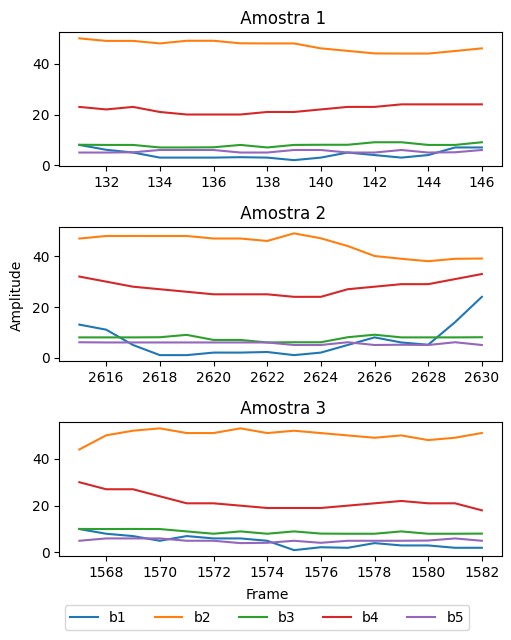

In [17]:
#plot graph
new_measures = {'m1': 'b1', 
             'm3': 'b2',
             'm5': 'b3',
             'm13': 'b4',
             'm4': 'b5'}

title = 'Amostra'
reference_measures = ['b1', 'b2', 'b3', 'b4', 'b5']

ALL_WORD_DT = ALL_WORD_DT.rename(columns=new_measures)
lines=[]

fig, axs = plt.subplots(len(id_sentence), 1, figsize=(5, 6))
for i, id in enumerate(id_sentence):
    dt = ALL_WORD_DT.query(f'block_id=={id}').reset_index(drop=True)
    y = dt.frame_seq.values
    dt = dt[reference_measures]
    #dt_norm = scaler.fit_transform(dt)
    # Criar um novo DataFrame com os dados normalizados
    #normalized_df = pd.DataFrame(dt_norm, columns=dt.columns)
    #axs[i].set_xlabel('Frame')
    #axs[i].set_ylabel('Amplitude Padronizada')
    line = axs[i].plot(y, dt, label=dt.columns)
    lines.append(line)
    axs[i].set_title(f' {title} {i+1}')
    
# Adicionar uma legenda fora dos subplots
fig.legend(lines[0], reference_measures, loc='outside lower center', bbox_to_anchor=(0.5, -0.07), ncol=len(dt.columns))
fig.text(0.5, 0, 'Frame', ha='center', va='center')
fig.text(0, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig(f'{word}_all_measures.png', bbox_inches='tight')
plt.show()